## Processing sensor data from Shale Hills CZO SPMS site ##

Marc Berghouse 8/8/2020

This array includes:
- Apogee Instruments SO-110 O2 sensors
- Eosense EosGP CO2 sensors
- OTT Pluvio rain gauge
- Custom built well
- nested-suction lysimeter (1900 series, SoilMoisture Equipment Corp., Santa Barbara, CA)
- ThiesCLIMA Laser Precipitation Monitor (LPM)


In [1]:
import os
os.chdir('C:/Users/marcb/Desktop')
os.getcwd()

'C:\\Users\\marcb\\Desktop'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Import color palettes
from palettable.colorbrewer.sequential import Blues_6 as AP_colors # O2
from palettable.colorbrewer.sequential import YlGn_6 as GP_colors # CO2
#from palettable.colorbrewer.sequential import YlOrBr_6 as SM_colors # Soil Moisture

# Define colors, depths and installtion material 
#Apogee SO-110
AP_colors = AP_colors.hex_colors[1:]
AP_depths = {1: 30, 2: 140}

#eosGP
GP_colors = GP_colors.hex_colors[1:]
GP_depths = {1: 30, 2: 140} # Note: eosGP1 may not be at 40cm


# Define filenames
infile1 = "CO2 Data/raw_data/Shale Hills/SPMS/SPMS_CO2_O2.csv" 
infile2 = "CO2 Data/raw_data/Shale Hills/SPMS/ShaleHills_precipitation.csv" 
infile3 = "CO2 Data/raw_data/Shale Hills/SPMS/ShaleHills_pCO2.csv" 
infile4 = "CO2 Data/raw_data/Shale Hills/SPMS/ShaleHills_Geochem_2006_11.csv" 

# Read the .dat files as Pandas dataframes and load in the date/times
df1 = pd.read_csv(infile1, na_values='NAN', parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN', parse_dates=[0], index_col=0) 
df3 = pd.read_csv(infile3, na_values='NAN',  index_col=['Sample Collection Date']) 
df4 = pd.read_csv(infile4, na_values='NAN', parse_dates=[0], index_col=1) 



In [3]:
#Rename all columns for df1 with format "var_depth.unit" 
#mask erroneous values in df1
#I was able to mask values based on percent change from the previous value, but the graph still looks bad and I am wondering if this CO2 data is usable at all
df1=df1.drop(columns='RecNum')
df1.columns=["DiffVolt_30cm.mV", "DiffVolt_140cm.mV", "SoilO2_30cm.percent.0-100", "SoilO2_140cm.percent.0-100",  "ApogeeTemp_30cm.deg.C" , "ApogeeTemp_140cm.deg.C", "CO2lo_30cm.ppm","CO2hi_30cm.ppm", "GPTemp_30cm.deg.C", "CO2lo_140cm.ppm", "CO2hi_140cm.ppm", "GPTemp_140cm.deg.C"]
df1.mask(df1<=-1, inplace=True)
df1["DiffVolt_30cm.mV"].mask(df1["DiffVolt_30cm.mV"]>=100, inplace=True)

#pd.set_option("display.max_rows", 20)
#df1['pct_change_CO2lo30']=(df1['CO2lo_30cm.ppm'].pct_change())
#df1['CO2lo_30cm.ppm'].mask(df1['pct_change_CO2lo30']>=.2, inplace=True)
#df1['CO2lo_30cm.ppm'].mask(df1['pct_change_CO2lo30']<=-.2, inplace=True)
#df1=df1.drop(columns='pct_ch')
#df1=df1.drop(columns='Record_copy')
#df1['pct_change_eosgp30']=(df1['GPTemp_30cm.deg.C'].pct_change())
#df1['GPTemp_30cm.deg.C'].mask(df1['pct_change_eosgp30']>=.2, inplace=True)
#df1['GPTemp_30cm.deg.C'].mask(df1['pct_change_eosgp30']<=-.2, inplace=True)
df1



,DiffVolt_30cm.mV,DiffVolt_140cm.mV,SoilO2_30cm.percent.0-100,SoilO2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C
TmStamp,,,,,,,,,,,,
2015-11-06 05:00:00,NaN,NaN,1.004000,13.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-06 06:00:00,NaN,NaN,1.004000,13.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-06 07:00:00,NaN,NaN,1.004000,13.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-06 08:00:00,NaN,NaN,1.004000,13.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-06 09:00:00,NaN,NaN,1.004000,13.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21 13:00:00,47.619999,47.650002,20.420000,18.510000,19.850000,17.82,5038.623000,4286.58790,19.25,5036.2476,17399.4880,17.879999
2020-07-21 14:00:00,47.580002,47.680000,20.400000,18.520000,19.820000,17.83,5038.879900,12236.78800,19.26,1277.8613,2644.7598,17.780001
2020-07-21 15:00:00,47.549999,47.709999,20.389999,18.530001,19.860001,17.83,6.451834,24.52564,19.26,5036.0977,22430.6720,17.820000


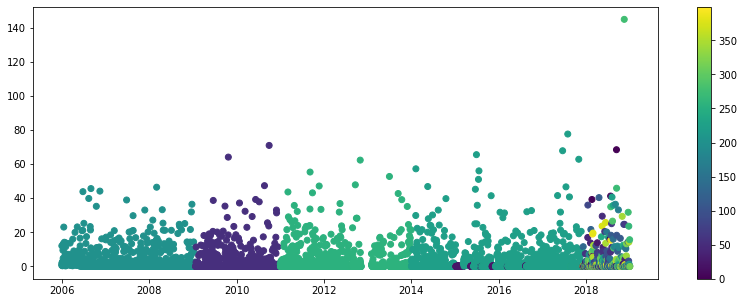

In [4]:
#Rename all columns for df2 with format "var_depth.unit" 
#mask erroneous values in df2
df2=df2.drop(columns='Correlation')
df2=df2.drop(columns='Comment')
df2.columns=["Precipitation.mm", "Device"]

#creating an id for each unique device so that it can be plotted on colormap
d = {ni: indi for indi, ni in enumerate(set(df2['Device']))}
df2['device_numbers'] = [d[ni] for ni in df2['Device']]

fig,ax=plt.subplots()
fig.set_size_inches(14,5)
im=ax.scatter(df2.index, df2['Precipitation.mm'], c=df2['device_numbers'])
cbar=fig.colorbar(im)

#df2

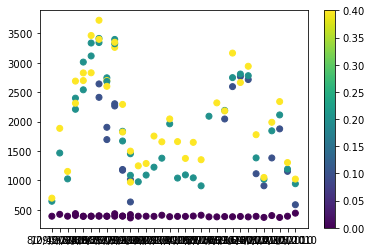

In [5]:
#Rename all columns for df3 with format "var_depth.unit" 
#mask erroneous values in df3
#separate columns based on depth. Is this actually necessary?
#drop unnecessary columns
df3=df3.loc[df3['Site (1)'] == 'SPMS'] 
df3['CO2_10cm.ppm']=np.where(df3['Depth (m)'] == .1, df3['pCO2 (ppmv)'], np.nan)
df3['CO2_20cm.ppm']=np.where(df3['Depth (m)'] == .2, df3['pCO2 (ppmv)'], np.nan)
df3['CO2_40cm.ppm']=np.where(df3['Depth (m)'] == .4, df3['pCO2 (ppmv)'], np.nan)
df3['CO2_0cm.ppm']=np.where(df3['Depth (m)'] == .0, df3['pCO2 (ppmv)'], np.nan)
df3=df3.drop(columns='Site (2)')
df3=df3.drop(columns='Sample Collection Time')
df3=df3.drop(columns='Tech')
df3=df3.drop(columns='Elevation (m)')
#df3=df3.drop(columns='pCO2 (ppmv)')
#df3=df3.drop(columns='Depth (m)')
df3=df3.drop(columns='Site (1)')

df3
fig,ax=plt.subplots()
im=ax.scatter(df3.index, df3['pCO2 (ppmv)'], c=df3['Depth (m)'])
cbar=fig.colorbar(im)

In [6]:
#Rename all columns for df4 with format "var_depth.unit"
#select correct site
#mask erroneous values in df4
df4=df4.loc[df4['SiteCode'] == 'SPMS'] 
df4=df4.drop(columns='RecordNum')
df4=df4.drop(columns='SampleNumber')
df4=df4.drop(columns='SiteCode')
#df4.mask(df4<=-1, inplace=True)
df4['DOC'].mask(df4['DOC']<=-1, inplace=True)
df4['pH'].mask(df4['pH']<=-1, inplace=True)
df4

,Depth,DOC,WaterTemp,pH,Alkalinity,Chloride,Nitrate,Sulfate,Fluoride,Acetate,...,Strontium,IronIII,Manganese,Nickel,Phosphorus,Vanadium,Zinc,Barium,Delta_2Hydrogen,Delta_18Oxygen
SampleDate,,,,,,,,,,,,,,,,,,,,,
2006-09-23,20,NaN,-9999.0,NaN,-9999.0,17.86372,25.354510,99.37437,-9999.0,-9999.0,...,0.228258,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
2006-09-23,40,NaN,-9999.0,NaN,-9999.0,36.11499,3.821997,371.80880,-9999.0,-9999.0,...,0.456517,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
2006-09-23,50,NaN,-9999.0,NaN,-9999.0,32.27547,2.663816,353.93330,-9999.0,-9999.0,...,0.456517,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
2006-10-20,10,NaN,-9999.0,NaN,-9999.0,-9999.00000,-9999.000000,-9999.00000,-9999.0,-9999.0,...,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
2006-10-20,20,NaN,-9999.0,NaN,-9999.0,-9999.00000,-9999.000000,-9999.00000,-9999.0,-9999.0,...,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-06-07,50,NaN,-9999.0,NaN,-9999.0,-9999.00000,-9999.000000,-9999.00000,-9999.0,-9999.0,...,0.138326,0.598417,2.988429,-9999.0,14.561130,-9999.0,2.723614,-9999.0,-9999.0,-9999.0
2011-09-21,10,4.945,-9999.0,NaN,-9999.0,31.08322,-999.000000,51.41786,-999.0,-9999.0,...,0.110060,1.991322,4.952884,-9999.0,1.258586,-9999.0,1.739566,-9999.0,-9999.0,-9999.0
2011-09-21,40,3.458,-9999.0,NaN,-9999.0,59.62764,-999.000000,176.65420,-999.0,-9999.0,...,0.246392,0.307864,1.668216,-9999.0,0.482366,-9999.0,0.465068,-9999.0,-9999.0,-9999.0


In [7]:
#is there a way to do this without 3 lines of code? my pd.concat code gives me a dataframe with incorrect timestamps 
df1_2 = df1.join(df2, how='outer')
df1_2_3=df1_2.join(df3, how='outer')
df=df1_2_3.join(df4, how='outer')
#df=pd.concat([df1, df2, df3, df4], join='outer')
df

,DiffVolt_30cm.mV,DiffVolt_140cm.mV,SoilO2_30cm.percent.0-100,SoilO2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,...,Strontium,IronIII,Manganese,Nickel,Phosphorus,Vanadium,Zinc,Barium,Delta_2Hydrogen,Delta_18Oxygen
2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21 13:00:00,47.619999,47.650002,20.420000,18.510000,19.850000,17.82,5038.623000,4286.58790,19.25,5036.2476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-21 14:00:00,47.580002,47.680000,20.400000,18.520000,19.820000,17.83,5038.879900,12236.78800,19.26,1277.8613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-21 15:00:00,47.549999,47.709999,20.389999,18.530001,19.860001,17.83,6.451834,24.52564,19.26,5036.0977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-21 16:00:00,47.490002,47.709999,20.360001,18.530001,19.959999,17.83,3545.709000,1824.88110,19.27,5036.5322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


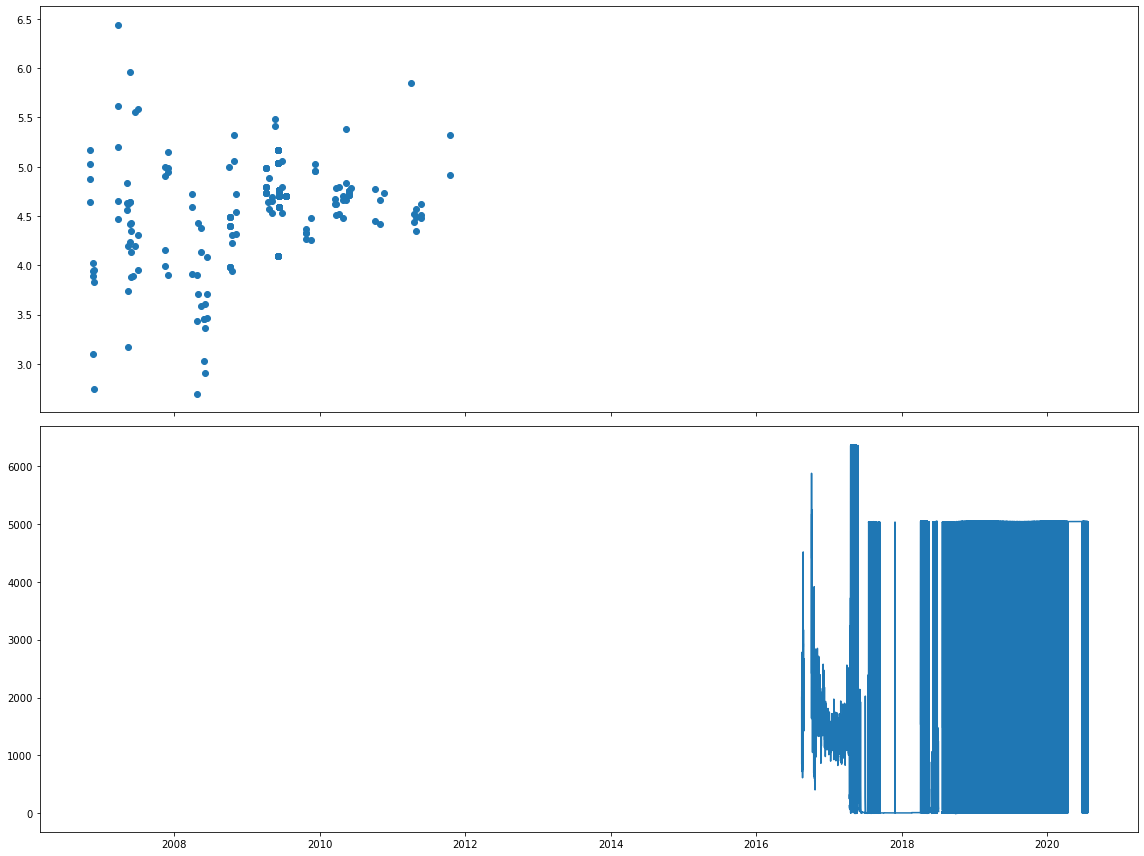

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)
ax1.scatter(df.index, df['pH'])
ax2.plot(df.index, df['CO2lo_30cm.ppm'])

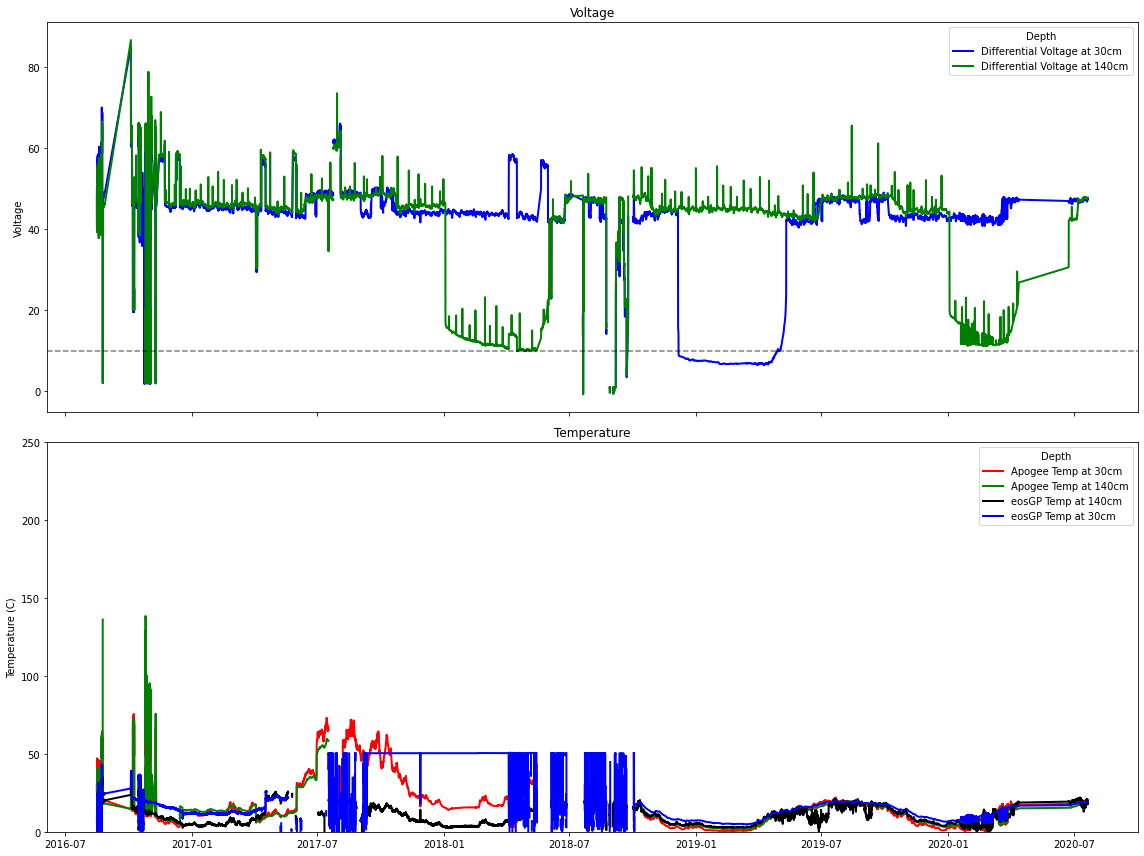

In [9]:
# Plot the datalogger parameters: battery voltage, panel temperature, enclosure temperature, and barometric pressure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)

# Apogee SO-110 differntial voltages
ax1.plot(df1.index, df1['DiffVolt_30cm.mV'], 'b', linewidth=2, label='Differential Voltage at 30cm')
ax1.plot(df1.index, df1['DiffVolt_140cm.mV'], 'g', linewidth=2, label='Differential Voltage at 140cm')
ax1.set(ylabel='Voltage', title='Voltage')#, ylim=[36,48])
ax1.axhline(y=10, linestyle='--', color='k', alpha=0.5)
ax1.legend(title='Depth', loc='best')

# datalogger temperatures
# eosGP at 30cm is messed up again
ax2.plot(df1.index, df1["ApogeeTemp_30cm.deg.C"], 'r', linewidth=2, label='Apogee Temp at 30cm')
ax2.plot(df1.index, df1["ApogeeTemp_140cm.deg.C"], 'g', linewidth=2, label='Apogee Temp at 140cm')
ax2.plot(df1.index, df1['GPTemp_140cm.deg.C'], 'k', linewidth=2, label='eosGP Temp at 140cm')
ax2.plot(df1.index, df1['GPTemp_30cm.deg.C'], 'b', linewidth=2, label='eosGP Temp at 30cm')
ax2.set(ylabel='Temperature (C)', title='Temperature', ylim=[0,250])
ax2.legend(title='Depth', loc='best')


In [10]:
#Correct Apogee SO-110 O2 data
# - Apogee data has already been calibrated, although it is in percent saturation. Should we switch to ppm, or is this fine? 
#cal_fac = 0.379
#offset = 1.14
#df['SoilO2_30cm.kPa'] = cal_fac*df['SoilO2_30cm.percent.0-100'] - offset # Convert from mV to kPa
#df['SoilO2_140cm.kPa'] = cal_fac*df['SoilO2_140cm.percent.0-100'] - offset

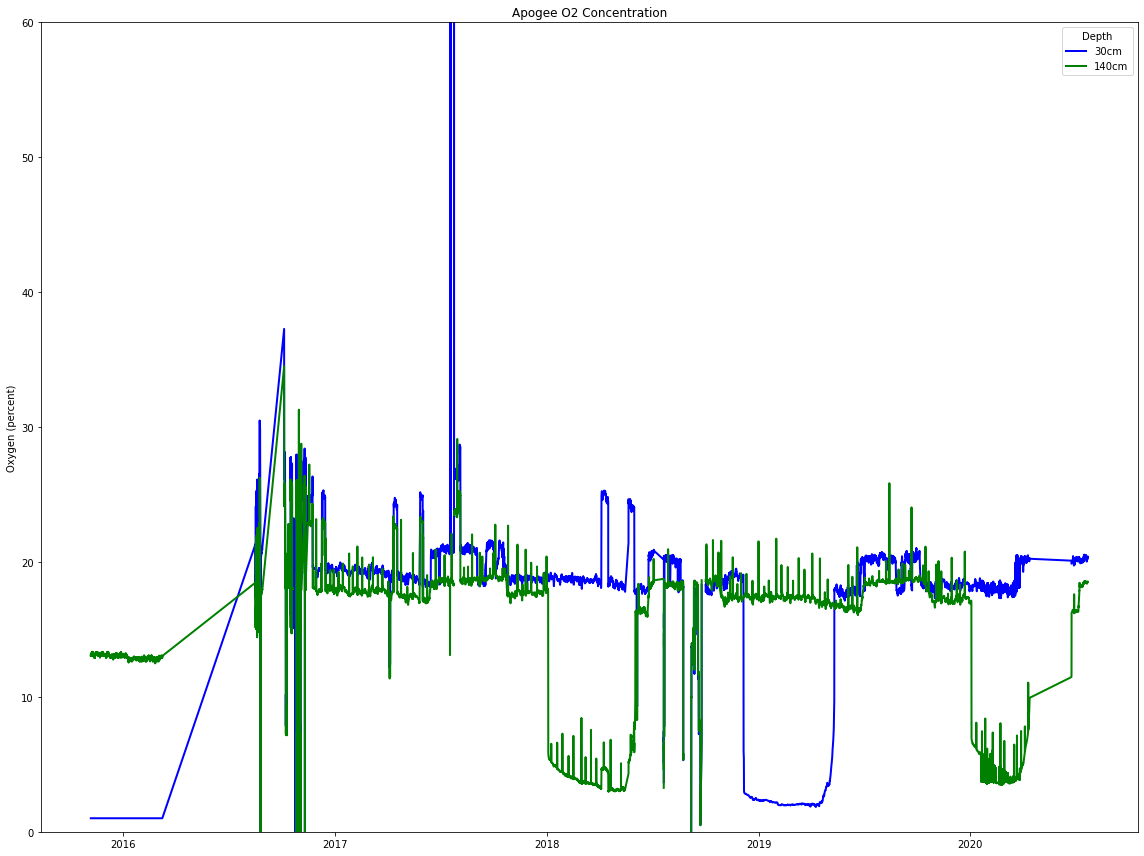

In [11]:
fig, (ax2) = plt.subplots(1, figsize=(16,12), sharex=True, tight_layout=True)
#ax1.plot(df1.index, df1.iloc[:,6], 'b', linewidth=2)
#ax1.set(ylabel='Temperature (C)', title='Apogee Temperature at 30cm')

ax2.plot(df1.index, df1['SoilO2_30cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration', ylim=(0,60))
ax2.plot(df1.index, df1['SoilO2_140cm.percent.0-100'], 'g', linewidth=2, label='140cm')
ax2.legend(title='Depth', loc='best')

#df['Apogee_CorrO2_Avg'] = df['SoilO2_30cm.kPa']/df['BarometricPress_Avg']*100
#ax3.plot(df.index, df['Apogee_CorrO2_Avg'], 'k', linewidth=2)
#ax3.set(ylabel='Oxygen (%)', title='Apogee O2 Concentration');

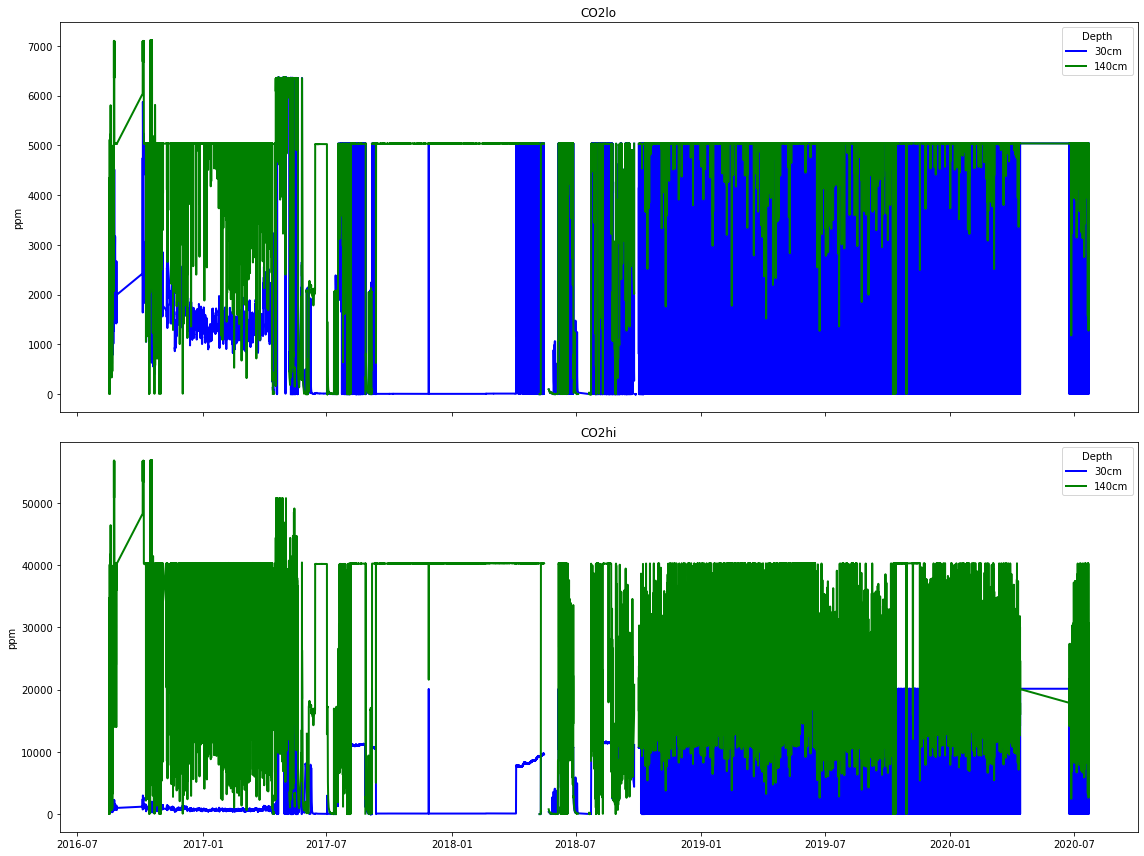

In [12]:
#Correct and plot CO2 data 

fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df1.index, df1['CO2lo_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax1.plot(df1.index, df1['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax1.set(ylabel='ppm', title='CO2lo')
ax1.legend(title='Depth', loc='best')
ax2.plot(df1.index, df1['CO2hi_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax2.plot(df1.index, df1['CO2hi_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax2.set(ylabel='ppm', title='CO2hi')
ax2.legend(title='Depth', loc='best')

In [13]:
output=df.copy()
today = dt.date.today()
outfile = 'CO2 Data/processed_data/Shale Hills/SPMS_CO2_O2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.EST')

In [14]:
output

,DiffVolt_30cm.mV,DiffVolt_140cm.mV,SoilO2_30cm.percent.0-100,SoilO2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,...,Strontium,IronIII,Manganese,Nickel,Phosphorus,Vanadium,Zinc,Barium,Delta_2Hydrogen,Delta_18Oxygen
2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21 13:00:00,47.619999,47.650002,20.420000,18.510000,19.850000,17.82,5038.623000,4286.58790,19.25,5036.2476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-21 14:00:00,47.580002,47.680000,20.400000,18.520000,19.820000,17.83,5038.879900,12236.78800,19.26,1277.8613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-21 15:00:00,47.549999,47.709999,20.389999,18.530001,19.860001,17.83,6.451834,24.52564,19.26,5036.0977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-21 16:00:00,47.490002,47.709999,20.360001,18.530001,19.959999,17.83,3545.709000,1824.88110,19.27,5036.5322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
